In [ ]:
#installer twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-_9prz7d0/twint_4bc8c1f49eb34679a19154dfa8d1b521
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-_9prz7d0/twint_4bc8c1f49eb34679a19154dfa8d1b521
  Running command git checkout -q origin/master


In [ ]:
#normalement ce n'est pas la peine d'installer word cloud quand on est sur colab
!git clone https://github.com/amueller/word_cloud.git


Cloning into 'word_cloud'...
remote: Enumerating objects: 6527, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 6527 (delta 38), reused 59 (delta 21), pack-reused 6441
Receiving objects: 100% (6527/6527), 116.94 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (3869/3869), done.


In [ ]:
cd word_cloud


/content/word_cloud


In [ ]:
!pip install .

Processing /content/word_cloud
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for wordcloud: filename=wordcloud-1.8.1.post9+g35ce9b7-cp37-cp37m-linux_x86_64.whl size=332927 sha256=9c0a2afb6fab0772db9f232cc979a9625d45cb89631f7db548a291342deac6d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-g9y4ootv/wheels/54/f5/77/89dfb02d5ae2d64f935572a2d1c518ef70729cb58cff47e659
Successfully built wordcloud
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [ ]:
import nest_asyncio
nest_asyncio.apply()

import time
import datetime
import twint

In [ ]:
class twintFetch():
  def __init__(self, nb_limit,out_file,search_terms):
    self.nb_limit=nb_limit
    self.out_file=out_file
    self.search_terms=search_terms


  def fech_tweets(self,since=None,until=None):
    print("Feaching tweets !")
    c=twint.Config()#set up twint config
    c.Search=self.search_terms

    if since is not None:
      c.Since=since
    if until is not None:
      c.Until=until
    
    c.Store_csv= True
    c.Output=self.out_file
    c.Limit=self.nb_limit
    twint.run.Search(c)

In [ ]:
#créer une instance de la classe twintFetch
my_nb_limit=1000
nb_max_tweet=20000
my_search="Politique france"
raw_corpus_filePath="/content/drive/MyDrive/Colab Notebooks/outputs/miningTwitter_{}.csv".format(my_search)
#instancier un featch object
runFetch=twintFetch(nb_limit=my_nb_limit,out_file=raw_corpus_filePath,search_terms=my_search)

In [ ]:
date=datetime.datetime.today()

In [ ]:
str_end_date=date.strftime("%Y-%m-%d %H:%M:%S")
curr_nb_fetch=0
#tant qu'on n'a pas attend le nombre max de tweets à extraire on continue nos requetes d'extraxtion en considérant 
#la date de debut de la requete précédente comme date de fin de la prochaine requete 
while(curr_nb_fetch<nb_max_tweet):
  date+=datetime.timedelta(days=-2)
  str_start_date=date.strftime("%Y-%m-%d %H:%M:%S")
  print("\n------","since",str_start_date,"until",str_end_date)
  runFetch.fech_tweets(since=str_start_date,until=str_end_date)
  curr_nb_fetch+=my_nb_limit
  str_end_date=str_start_date
  print("---",curr_nb_fetch,"\n")
  time.sleep(10)


------ since 2022-04-09 07:01:40 until 2022-04-11 07:01:40
Feaching tweets !
1513411880697614338 2022-04-11 07:01:24 +0000 <paula_elkhoury> Moi je me retire définitivement de la vie politique 😜 Triste score pour les candidates #femmes qui militent pour les questions de femmes. Par ex. la droite a voté "à Macron tous" dès le 1er tour. Serait-il le cas si leur candidat était un #homme ? A quand ce machisme ? #France ?  https://t.co/s8x142K696
1513411833767550977 2022-04-11 07:01:13 +0000 <2022Nemesis> @Xiao_pinguo_fr @Raslebo75750522 @Francois_Ruffin @JLMelenchon La France ne doit pas être livrée aux mondialistes. Serrons les rangs, peut importe nos choix. Le changement ne sera probablement pas politique de toute façon. Pour moi, la solution sera humaine.
1513411768827138050 2022-04-11 07:00:58 +0000 <JosRodr55278514> @jeanmichelbern9 @LabVince Oui pour Jadot futur ministre de Macron, peut être aussi Pécresse... Mais pas pour des insoumis, sauf si quelques opportunistes arrivistes d'ex-

KeyboardInterrupt: ignored

# Nettoyage des données

In [ ]:
!pip install emoji

1513268706691928066 2022-04-10 21:32:29 +0000 <ameliedourneau> J'aime pas parler politique mais là j'ai mal a ma France
1513268332312633346 2022-04-10 21:31:00 +0000 <maudet_tom> @amine_dhss Aucun des deux n’est bien selon toi après chacun ses idées politique et ses préférences mais il faut du nouveau pour le France et certainement pas un second quinquennat de Macron, 3/4 des personnes votant Macron ne s’intéresse pas à la politique
1513268247239528454 2022-04-10 21:30:39 +0000 <Iscanyrr> @umuut75 @lakaradenizli Je l’aime énormément jean lassale, c’est le seul homme politique en France qui est vrai, honnête. Mais on va pas se mentir, il n’aurais aucune chance de passer au 2nd tour. Et c’est ultra triste. Donc je peux pas gaspiller mon vote et laisser + de chance a l’extrême droite.
1513268164947283969 2022-04-10 21:30:20 +0000 <parmenide123> France 2022: Macron appelle au rassemblement, plaide pour "un grand mouvement politique"  https://t.co/ZYPYhHTPxz  🤜🤜#Macron Va te faire foutre, c

In [ ]:
import re
import emoji
import pandas as pd

In [ ]:
def nlp_pipeline(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[\[,\]\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r"«", "", text)
    text = re.sub(r"»", "", text)
    text = re.sub(r"•", "", text)
    text = re.sub(r"“", "", text)
    text = re.sub(r"”", "", text)
    text = emoji.get_emoji_regexp().sub(u'', text)
    return text

lire les tweets et afficher les colonnes

In [ ]:
tweet_file_path=raw_corpus_filePath
tweet=pd.read_csv(tweet_file_path)
print("\n","-"*10,"\n","# tweet data","\n","-"*10)
print(tweet.columns,"\n")
print(tweet.shape)


 ---------- 
 # tweet data 
 ----------
Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object') 

(18419, 36)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


afficher les premiers tweets

In [ ]:
print("\n","-"*10,"\n","# les premiers tweets","\n","-"*10)
print(tweet['tweet'].head(n=20),"\n")


 ---------- 
 # les premiers tweets 
 ----------
0     @EmmanuelMacron si vous pouvez, alors faites ç...
1     @froelijosette @Reconquete_Z Ne commencons pas...
2     @BFMTV Et après la France parle et continue de...
3     Vous êtes nuisibles à la démocratie, vous FORC...
4     « Marion Maréchal m’apporte son amitié, son in...
5     et oui contrairement a la compétition industri...
6     @MarionMarechal @MedecinZemmour @Calvi3D Le re...
7     @CCastaner @EmmanuelMacron @LaREM_AN Tant d’er...
8     @vale_cmg Vous découvrez le monde politique ? ...
9     Petit témoignage dans un commentaire sous la v...
10    "Pas du spectacle politique" dit Mme Thévenot....
11    @cresus1ier Et qui l’a dans le baba ? La Franc...
12    « Marion Maréchal m’apporte son amitié, son in...
13    @docgill95 @GenFrexit @AlbertCamus75 Le gaulli...
14    « Marion Maréchal m’apporte son amitié, son in...
15    « Marion Maréchal m’apporte son amitié, son in...
16    « Marion est une amie de longue date, elle m'a..

parcourir les tweets tout en les nettoyant

In [ ]:
corpus=tweet['tweet']
corpus_clean=corpus.apply(nlp_pipeline)
tweet['tweet']=corpus_clean
#garder que les tweets en francais
tweet=tweet[tweet['language']=='fr']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'


In [ ]:
print("\n","-"*10,"\n","# tweets nettoyés","\n","-"*10)
print(tweet['tweet'].head(n=20),"\n")

#enregistrer la version clean
tweet_clean_file_path=tweet_file_path.replace(".csv","_clean.csv")
tweet.to_csv(tweet_clean_file_path,index=False)


 ---------- 
 # tweets nettoyés 
 ----------
0     emmanuelmacron si vous pouvez alors faites ça ...
1     froelijosette reconquete_z ne commencons pas l...
2     bfmtv et après la france parle et continue de ...
3     vous êtes nuisibles à la démocratie vous force...
4      marion maréchal m’apporte son amitié son inte...
5     et oui contrairement a la compétition industri...
6     marionmarechal medecinzemmour  le retour de la...
7     ccastaner emmanuelmacron larem_an tant d’erreu...
8     vale_cmg vous découvrez le monde politique  no...
9     petit témoignage dans un commentaire sous la v...
10    pas du spectacle politique dit mme thévenot.  ...
11     et qui l’a dans le baba  la france  l union e...
12     marion maréchal m’apporte son amitié son inte...
13     genfrexit  le gaullisme n'est pas une doctrin...
14     marion maréchal m’apporte son amitié son inte...
15     marion maréchal m’apporte son amitié son inte...
16     marion est une amie de longue date elle m'app...
17

In [ ]:
print(tweet['place'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18414    NaN
18415    NaN
18416    NaN
18417    NaN
18418    NaN
Name: place, Length: 18346, dtype: object


Liste des stops words

In [ ]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [ ]:
list_of_stop_word_2 = list(fr_stop)

In [ ]:
list_of_stop_word_2

['est',
 'car',
 'lesquels',
 'pres',
 'reste',
 'pu',
 'façon',
 'seront',
 'quant',
 'ont',
 'première',
 'lui-même',
 's’',
 'aucune',
 'etre',
 'lui',
 'sept',
 'hé',
 'memes',
 'puis',
 'toutes',
 'autrement',
 'auront',
 'le',
 'plus',
 'naturelle',
 'longtemps',
 'semble',
 'personne',
 'dernier',
 'lès',
 'ohé',
 'sait',
 'plusieurs',
 'chut',
 'devra',
 'parseme',
 'ton',
 'divers',
 'hui',
 'quarante',
 'mille',
 'cela',
 'elle-même',
 'proche',
 'peut',
 'uniques',
 'eux-mêmes',
 'notre',
 "quelqu'un",
 'avaient',
 'auquel',
 'donc',
 'celles',
 'ni',
 'cinq',
 'vives',
 'toc',
 'vlan',
 'vas',
 'nos',
 'necessaire',
 'ô',
 'j’',
 'neuvième',
 'mienne',
 'tsoin',
 'être',
 'non',
 'es',
 'tac',
 'tic',
 'uns',
 'quatre',
 'dehors',
 'ah',
 'ai',
 'pure',
 'nôtre',
 'celui-là',
 'dire',
 'dix-neuf',
 'chère',
 'entre',
 'étais',
 'las',
 'mais',
 'c’',
 'siens',
 'souvent',
 'suffisante',
 'soi',
 'derniere',
 'celles-ci',
 'enfin',
 'elle',
 'hi',
 't’',
 'tienne',
 'dix-hui

In [59]:
list_of_stop_word_2 += ['de', 'la','et','le','en','les','à','pas','pour','que','un','des','est']
list_of_stop_word_2

['est',
 'car',
 'lesquels',
 'pres',
 'reste',
 'pu',
 'façon',
 'seront',
 'quant',
 'ont',
 'première',
 'lui-même',
 's’',
 'aucune',
 'etre',
 'lui',
 'sept',
 'hé',
 'memes',
 'puis',
 'toutes',
 'autrement',
 'auront',
 'le',
 'plus',
 'naturelle',
 'longtemps',
 'semble',
 'personne',
 'dernier',
 'lès',
 'ohé',
 'sait',
 'plusieurs',
 'chut',
 'devra',
 'parseme',
 'ton',
 'divers',
 'hui',
 'quarante',
 'mille',
 'cela',
 'elle-même',
 'proche',
 'peut',
 'uniques',
 'eux-mêmes',
 'notre',
 "quelqu'un",
 'avaient',
 'auquel',
 'donc',
 'celles',
 'ni',
 'cinq',
 'vives',
 'toc',
 'vlan',
 'vas',
 'nos',
 'necessaire',
 'ô',
 'j’',
 'neuvième',
 'mienne',
 'tsoin',
 'être',
 'non',
 'es',
 'tac',
 'tic',
 'uns',
 'quatre',
 'dehors',
 'ah',
 'ai',
 'pure',
 'nôtre',
 'celui-là',
 'dire',
 'dix-neuf',
 'chère',
 'entre',
 'étais',
 'las',
 'mais',
 'c’',
 'siens',
 'souvent',
 'suffisante',
 'soi',
 'derniere',
 'celles-ci',
 'enfin',
 'elle',
 'hi',
 't’',
 'tienne',
 'dix-hui

In [60]:
from spacy.lang.fr import French
nlp=French()

In [61]:
tokenizer_spacy = lambda x: [token.text for token in nlp.tokenizer(x) if len(token) >= 2 and not token.is_punct]

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
#on crée notre vectorizer qui est une instance de la classe CountVectorizer
vectorizer = CountVectorizer(
    stop_words=list_of_stop_word_2,
    tokenizer=tokenizer_spacy,
    min_df=5,
)
texts = tweet['tweet'].values
X_count = vectorizer.fit_transform(texts)#fit_transform ca va me calculer ma matrice

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['qu', "quelqu'"] not in stop_words.
  % sorted(inconsistent)


In [64]:
print(X_count)

  (0, 2406)	1
  (0, 5552)	1
  (0, 2748)	1
  (0, 7606)	1
  (0, 7970)	2
  (0, 698)	1
  (0, 6596)	1
  (0, 4950)	1
  (0, 432)	1
  (0, 3120)	1
  (0, 5474)	1
  (0, 6963)	1
  (0, 5305)	1
  (0, 5668)	1
  (0, 4944)	1
  (0, 2977)	1
  (0, 1130)	1
  (0, 5453)	1
  (0, 171)	1
  (1, 2977)	1
  (1, 5453)	1
  (1, 6040)	1
  (1, 572)	1
  (1, 7548)	1
  (1, 1834)	1
  :	:
  (18343, 3339)	1
  (18343, 7654)	1
  (18343, 4172)	1
  (18343, 6214)	1
  (18343, 5249)	1
  (18343, 6219)	1
  (18343, 2702)	1
  (18343, 2770)	1
  (18343, 5658)	1
  (18343, 444)	1
  (18343, 5723)	1
  (18343, 7647)	1
  (18343, 16)	1
  (18344, 2977)	1
  (18344, 5453)	1
  (18344, 6755)	1
  (18344, 93)	1
  (18344, 2501)	1
  (18344, 605)	1
  (18344, 1141)	1
  (18345, 2977)	1
  (18345, 5453)	1
  (18345, 1676)	1
  (18345, 5290)	1
  (18345, 4725)	1


In [ ]:
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

def word_cloud_from_text(text):
    wordcloud = WordCloud(background_color="white", stopwords=list_of_stop_word_2, max_words=50, scale=10).generate_from_text(text)
    #stopwords c'est pour enlever les stops words
    #max_word nombre maximal de mots que je vais avoir
    #scale permet d'avoir un compromis entre le temps d'éxecution et la qualité de la représentation (si scale=1 image un peu flou mais exécution rapide)
    fig = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud) #Display data as an image
    plt.axis("off")
    plt.title('Word Cloud classic3')
    plt.show()

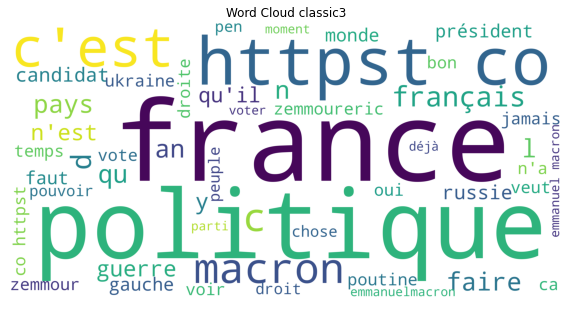

In [65]:
all_text = " ".join(texts)#join va prendre la liste de chaine de caractéres texts elle va les rendre une seule chaine séparés par des espaces
word_cloud_from_text(all_text)

extraire les top hashtags

In [66]:
import re
hashtags = tweet['tweet'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() ))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

TOP users

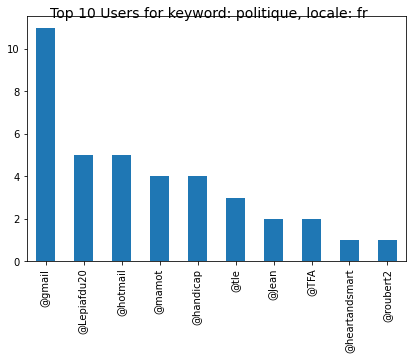

In [68]:
plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 10 Users for keyword: politique, locale: fr', fontsize=14)
tweet['name'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar')

In [69]:
import re
words = tweet['tweet'].dropna().apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y)))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [ ]:
words.head(10)

,word,occurences
0,e,457010.0
1,a,256150.0
3,i,243515.0
5,n,235082.0
2,s,225393.0
8,t,222181.0
7,r,216575.0
4,o,189780.0
6,u,188888.0
11,l,182549.0


In [70]:
words_in_tweet = [tweet.lower().split() for tweet in tweet['tweet']]

In [71]:
words_in_tweet

[['emmanuelmacron',
  'si',
  'vous',
  'pouvez',
  'alors',
  'faites',
  'ça',
  'vite',
  'pour',
  'éviter',
  'ce',
  'bain',
  'de',
  'sang.',
  'mais',
  'vous',
  'les',
  'occidentaux',
  'apprenez',
  'aussi',
  'à',
  'éviter',
  'ces',
  'genres',
  "d'escalades",
  'avant',
  'que',
  'la',
  'population',
  'ne',
  'subisse',
  'des',
  'pertes.',
  'je',
  'profite',
  'à',
  'cette',
  'occasion',
  'vous',
  'dire',
  'que',
  'la',
  'france',
  'doit',
  'changer',
  'sa',
  'politique',
  'en',
  'afrique.'],
 ['froelijosette',
  'reconquete_z',
  'ne',
  'commencons',
  'pas',
  'les',
  'attaques',
  'sur',
  'la',
  'vie',
  'privee.',
  'elevons',
  'le',
  'debat',
  'la',
  'france',
  'merite',
  'mieux',
  'que',
  'la',
  'politique',
  'de',
  'caniveau',
  'que',
  'fait',
  'macron.'],
 ['bfmtv',
  'et',
  'après',
  'la',
  'france',
  'parle',
  'et',
  'continue',
  'de',
  'ciré',
  'les',
  'pompe',
  'aux',
  'allemands',
  'les',
  'chiens',
  'n

In [72]:
import collections
# List of all words across tweets
all_words = [item for sublist in words_in_tweet for item in sublist]
# Create counter
counts_no_urls = collections.Counter(all_words)

counts_no_urls.most_common(15)


[('de', 28078),
 ('la', 27918),
 ('politique', 16796),
 ('france', 14833),
 ('et', 14015),
 ('le', 11853),
 ('en', 11688),
 ('les', 9547),
 ('à', 9460),
 ('pas', 7460),
 ('pour', 7219),
 ('que', 7082),
 ('des', 6828),
 ('est', 6231),
 ('un', 6145)]

In [74]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])

clean_tweets_no_urls.head()


,words,count
0,de,28078
1,la,27918
2,politique,16796
3,france,14833
4,et,14015


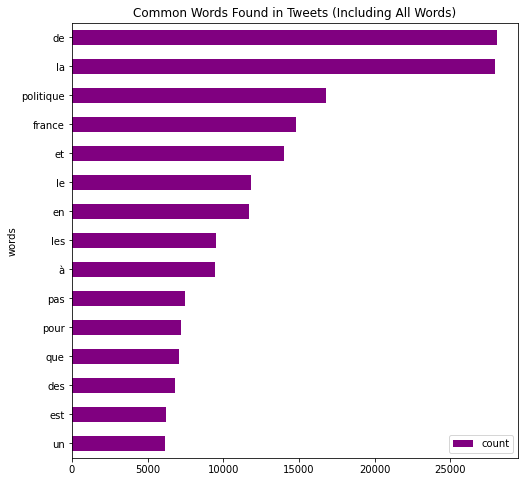

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


# Analyse de sentiments

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.taggers import PatternTagger
from textblob.sentiments import PatternAnalyzer

In [ ]:
polarity=[] #in [-1,1]  1 pour positive -1 pour negative statement
subjectivity=[] #in [0,1] proche de 1 veut dire qu'il s'agit de l'opinion public

In [ ]:
for my_tweet in tweet['tweet']:
  polarity.append(TextBlob(str(my_tweet),
                           pos_tagger=PatternTagger(),
                           analyzer=PatternAnalyzer()).sentiment[0])

In [ ]:
subjectivity.append(TextBlob(str(my_tweet),
                           pos_tagger=PatternTagger(),
                           analyzer=PatternAnalyzer()).sentiment[1])

In [ ]:
corpus_pola=pd.concat([tweet,pd.Series(polarity)],axis=1)
corpus_pola.columns=[*corpus_pola.columns[:-1],'polarity']
corpus_pola=pd.concat([corpus_pola,pd.Series(subjectivity)],axis=1)
corpus_pola.columns=[*corpus_pola.columns[:-1],'subjectivity']

print("\n","-"*10,"\n","# tweet content with polarity and subjectivity","\n","-"*10)
print(corpus_pola[['tweet','polarity','subjectivity']].head(n=100))


 ---------- 
 # tweet content with polarity and subjectivity 
 ----------
                                                tweet  polarity  subjectivity
0   emmanuelmacron si vous pouvez alors faites ça ...      0.00           0.0
1   froelijosette reconquete_z ne commencons pas l...      0.00           NaN
2   bfmtv et après la france parle et continue de ...      0.00           NaN
3   vous êtes nuisibles à la démocratie vous force...      0.00           NaN
4    marion maréchal m’apporte son amitié son inte...      0.00           NaN
5   et oui contrairement a la compétition industri...      0.00           NaN
6   marionmarechal medecinzemmour  le retour de la...      0.00           NaN
7   ccastaner emmanuelmacron larem_an tant d’erreu...      0.00           NaN
8   vale_cmg vous découvrez le monde politique  no...      0.15           NaN
9   petit témoignage dans un commentaire sous la v...     -0.30           NaN
10  pas du spectacle politique dit mme thévenot.  ...      0.00    

In [ ]:
#sorted_corpus_pola=corpus_pla[['tweet','polarity'].sort_values('polarity')